In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('Apple-Fitness-Data.csv')

In [3]:
column_names = data.columns.tolist()
print(column_names)

['Date', 'Time', 'Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed']


In [4]:
num_rows, num_cols = data.shape
print(num_rows, num_cols)

149 8


In [5]:
first_three_rows = data.head(3)
print(first_three_rows)

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  


In [9]:
df=data

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2940\4170370599.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


In [11]:
print(df.head())

        Date      Time  Step Count  Distance  Energy Burned  Flights Climbed  \
0 2023-03-21  16:01:23          46   0.02543         14.620                3   
1 2023-03-21  16:18:37         645   0.40041         14.722                3   
2 2023-03-21  16:31:38          14   0.00996         14.603                4   
3 2023-03-21  16:45:37          13   0.00901         14.811                3   
4 2023-03-21  17:10:30          17   0.00904         15.153                3   

   Walking Double Support Percentage  Walking Speed  
0                              0.304          3.060  
1                              0.309          3.852  
2                              0.278          3.996  
3                              0.278          5.040  
4                              0.281          5.184  


In [12]:
summary_df = df.describe(include='all').transpose()
print(summary_df)

                                   count unique       top freq  \
Date                                 149    NaN       NaN  NaN   
Time                                 149    148  13:42:14    2   
Step Count                         149.0    NaN       NaN  NaN   
Distance                           149.0    NaN       NaN  NaN   
Energy Burned                      149.0    NaN       NaN  NaN   
Flights Climbed                    149.0    NaN       NaN  NaN   
Walking Double Support Percentage  149.0    NaN       NaN  NaN   
Walking Speed                      149.0    NaN       NaN  NaN   

                                                            mean  \
Date                               2023-03-26 07:14:53.959731456   
Time                                                         NaN   
Step Count                                            224.959732   
Distance                                                0.147963   
Energy Burned                                          14.497933 

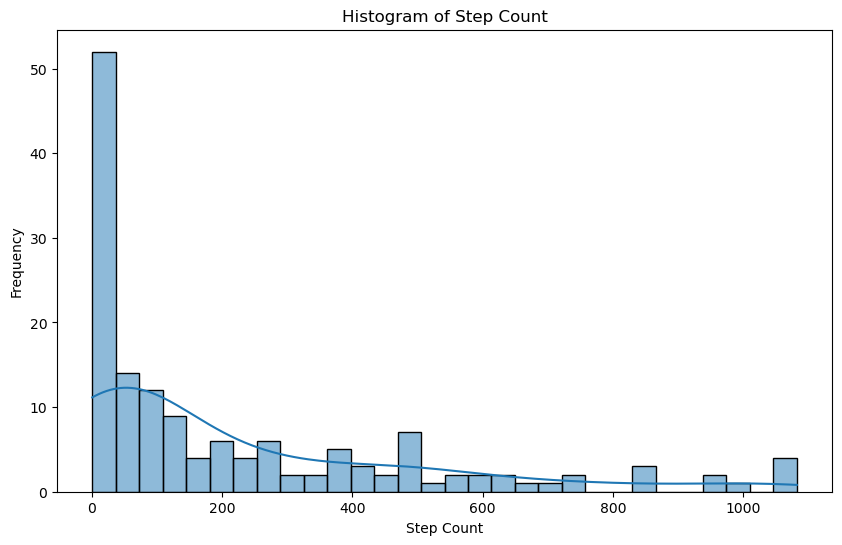

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Step Count'], bins=30, kde=True)
plt.title('Histogram of Step Count')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.show()

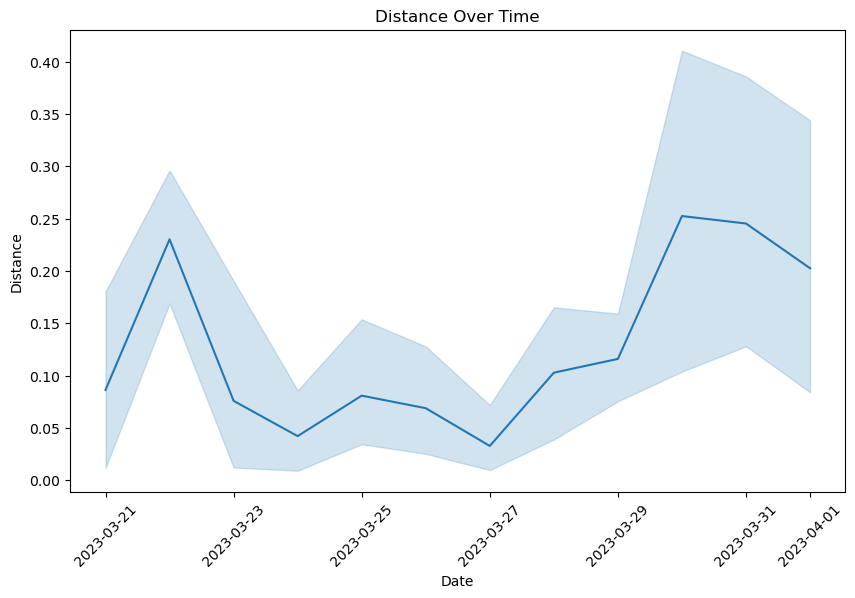

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Distance', data=df)
plt.title('Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()

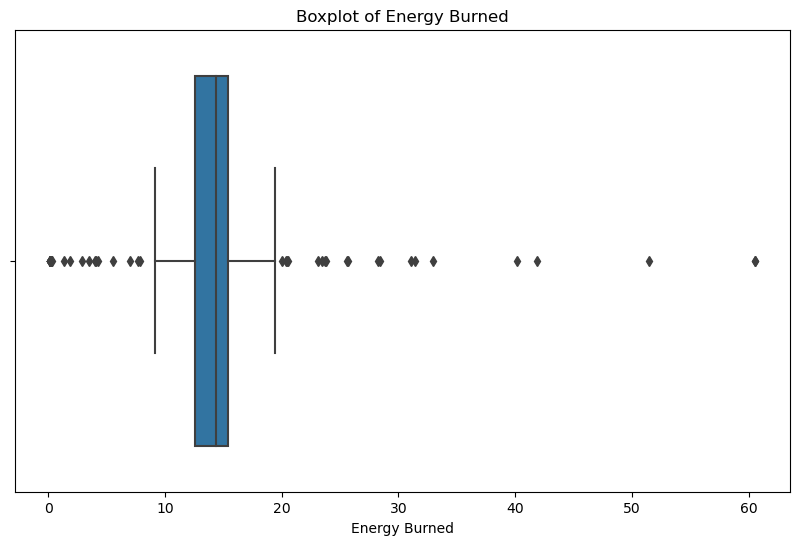

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Energy Burned', data=df)
plt.title('Boxplot of Energy Burned')
plt.xlabel('Energy Burned')
plt.show()

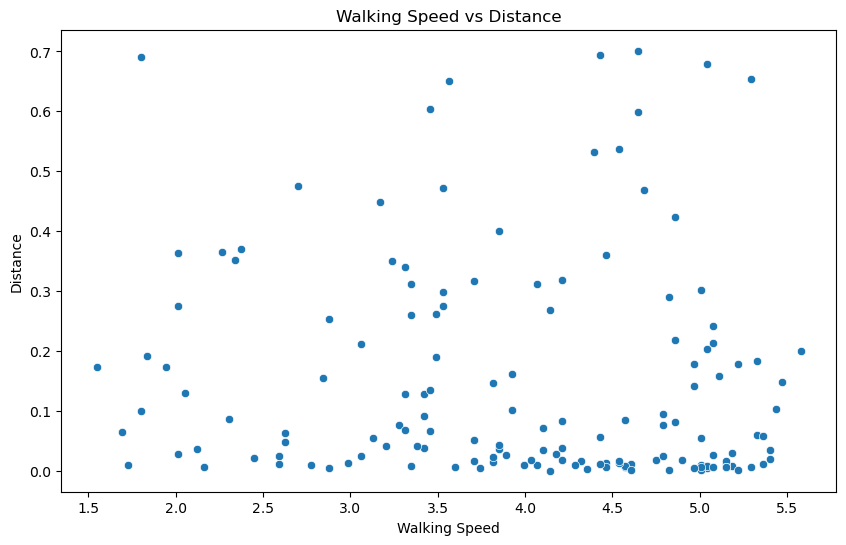

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Walking Speed', y='Distance', data=df)
plt.title('Walking Speed vs Distance')
plt.xlabel('Walking Speed')
plt.ylabel('Distance')
plt.show()

In [18]:
melted_df = pd.melt(df, id_vars=['Date'], value_vars=['Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed'])

In [19]:
print(melted_df.head())

        Date    variable  value
0 2023-03-21  Step Count   46.0
1 2023-03-21  Step Count  645.0
2 2023-03-21  Step Count   14.0
3 2023-03-21  Step Count   13.0
4 2023-03-21  Step Count   17.0


In [20]:
daily_summary = df.groupby('Date').agg({
    'Step Count': 'sum',
    'Distance': 'sum',
    'Energy Burned': 'sum',
    'Flights Climbed': 'sum',
    'Walking Double Support Percentage': 'mean',
    'Walking Speed': 'mean'
}).reset_index()


print(daily_summary.head())


        Date  Step Count  Distance  Energy Burned  Flights Climbed  \
0 2023-03-21        1514   0.94847        161.934               32   
1 2023-03-22       10627   6.90782        454.747               74   
2 2023-03-23         873   0.60637        114.424               19   
3 2023-03-24         388   0.25240         91.612               16   
4 2023-03-25        1053   0.72672        135.542               23   

   Walking Double Support Percentage  Walking Speed  
0                           0.294273       4.352727  
1                           0.310467       3.502800  
2                           0.312375       3.762000  
3                           0.307333       3.936000  
4                           0.297778       3.520000  


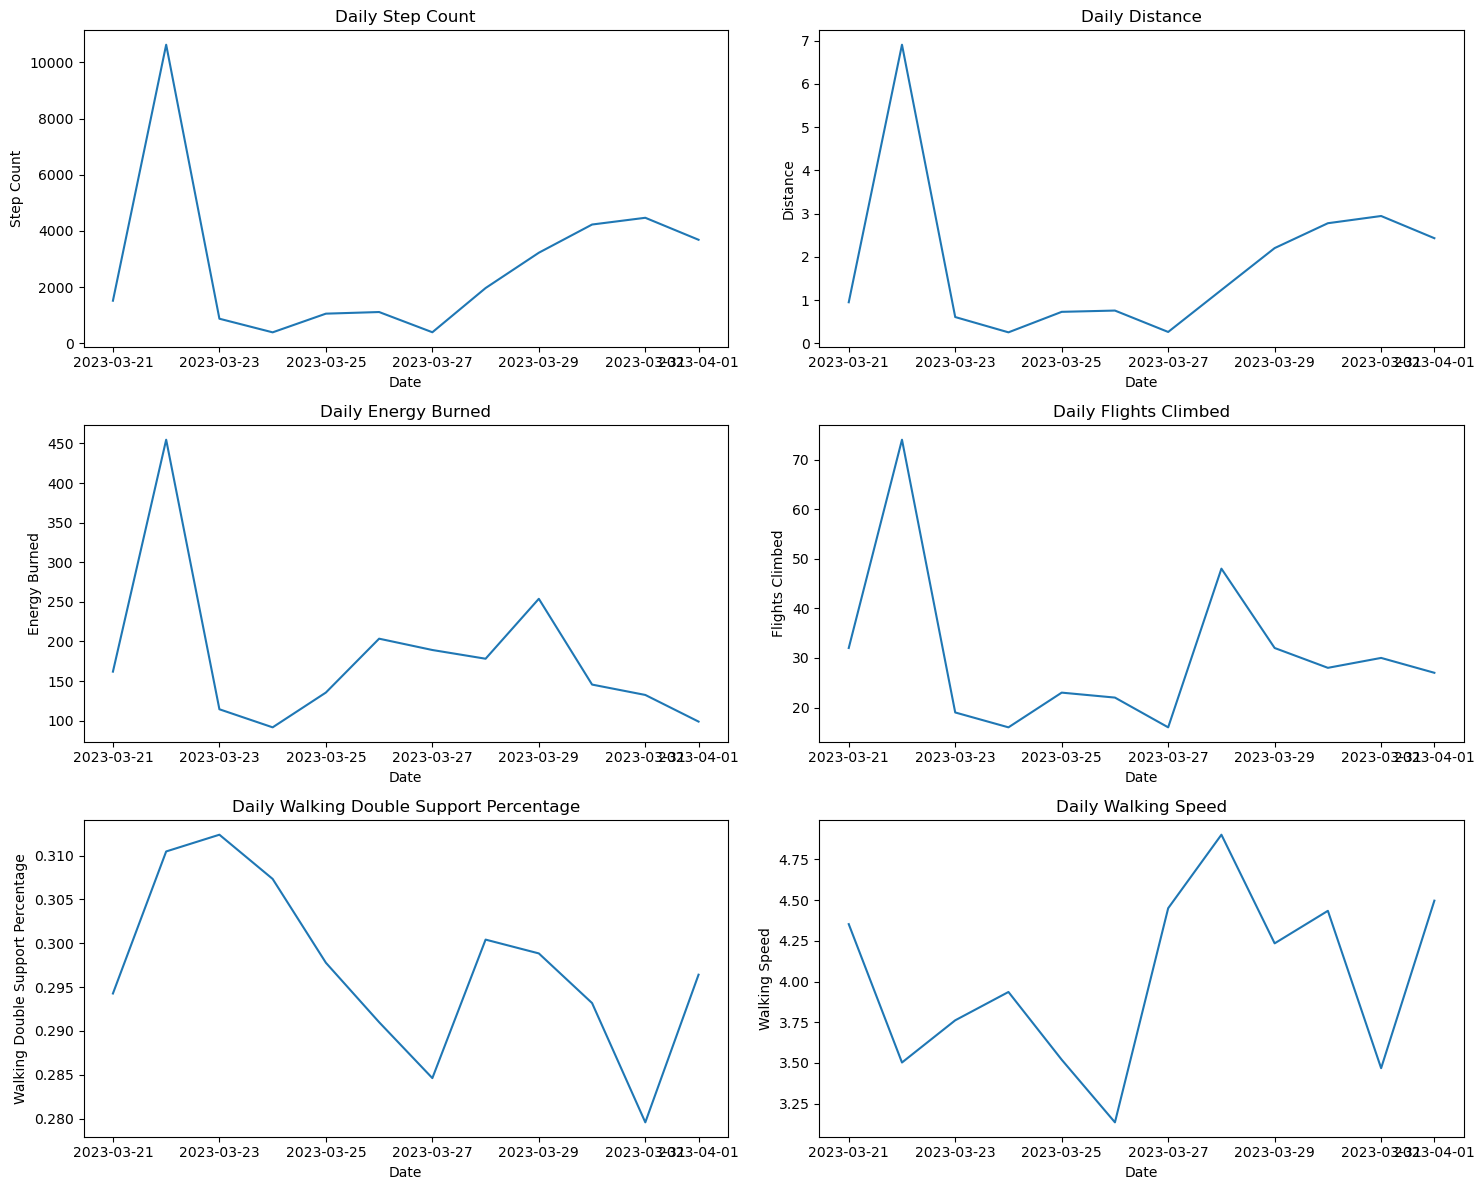

In [21]:
# Time series plot of daily summaries
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

sns.lineplot(x='Date', y='Step Count', data=daily_summary, ax=ax[0, 0])
ax[0, 0].set_title('Daily Step Count')

sns.lineplot(x='Date', y='Distance', data=daily_summary, ax=ax[0, 1])
ax[0, 1].set_title('Daily Distance')

sns.lineplot(x='Date', y='Energy Burned', data=daily_summary, ax=ax[1, 0])
ax[1, 0].set_title('Daily Energy Burned')

sns.lineplot(x='Date', y='Flights Climbed', data=daily_summary, ax=ax[1, 1])
ax[1, 1].set_title('Daily Flights Climbed')

sns.lineplot(x='Date', y='Walking Double Support Percentage', data=daily_summary, ax=ax[2, 0])
ax[2, 0].set_title('Daily Walking Double Support Percentage')

sns.lineplot(x='Date', y='Walking Speed', data=daily_summary, ax=ax[2, 1])
ax[2, 1].set_title('Daily Walking Speed')

plt.tight_layout()
plt.show()
